# Predicting the 10th day closing stock price of thr TESLA company, given 9 number of previous days closing stock prices.

Our objective is to predict the closing stock price of next day for given x number of previous days prices. 

Our model, therefore, must accept x number of features -- each of which is the stock price, in sequence, over the past X days

To get our data, go to https://finance.yahoo.com/quote/TSLA/history?p=TSLA (which is the stock history of TESLA company) and download stock data for the 1 years. Downlown this data (it will be in csv format) and store it in your working directory (the directory this notebook is in).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

## Read the Dataset

In [2]:
import pandas as pd

tesla = pd.read_csv('TSLA.csv')

tesla.head()
tesla.shape

(250, 7)

In [3]:
tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [83]:
tesla = tesla[['Close']]  # Select only the 'Close' column

In [5]:
tesla

,Close
0,332.673340
1,292.140015
2,293.836670
3,292.503326
4,290.253326
...,...
245,187.039993
246,184.309998
247,180.589996
248,162.990005


## Data cleanup if any.

In [6]:
tesla['Close'].isna().sum() #checking for null vlaues

0


There are no null values in the target data

In [7]:
row_count = tesla.shape[0] # store the number of obersvations (daily stock prices readings)
row_count

250

In [8]:
prices = tesla.to_numpy() # to make things easier, we create a numpy array from our dataframe of stock prices
prices.shape

(250, 1)

In [9]:
sequence_length = 10  # here, lets create a variable to hold the number of days that will be in a sequence.

In [10]:
prices = prices[row_count % sequence_length: ] # Since our data is a multiple of sequence_length, we will get the same number of observations.
prices.shape

(250, 1)

In [11]:
prices = prices.reshape(row_count // sequence_length, sequence_length) # note that temps are a multiple of sequence length, we can split the data into rows of sequence length.
prices

array([[332.67334 , 292.140015, 293.83667 , 292.503326, 290.253326,
        300.980011, 303.083344, 317.540009, 291.093323, 288.549988],
       [262.369995, 266.679993, 244.666672, 242.666672, 256.529999,
        241.456665, 253.869995, 236.603333, 236.473328, 221.300003],
       [224.96666 , 209.386673, 219.600006, 235.910004, 253.210007,
        252.753326, 246.789993, 258.333344, 234.516663, 238.279999],
       [238.886673, 241.866669, 239.706665, 232.229996, 215.736664,
        220.889999, 233.      , 213.100006, 216.759995, 237.036667],
       [236.08667 , 235.070007, 245.706665, 244.919998, 232.66333 ,
        228.490005, 224.473328, 227.263336, 233.066666, 231.733337],
       [244.543335, 250.763336, 234.343338, 233.070007, 237.039993,
        238.313339, 240.066666, 240.546661, 245.529999, 247.5     ],
       [271.706665, 272.243347, 268.433319, 258.859985, 274.820007,
        280.899994, 297.149994, 297.276672, 300.58667 , 307.396667],
       [308.633331, 288.170013, 290.42334

In [12]:
# Convert to dataframe

prices_df = pd.DataFrame(prices, columns=np.arange(0,10,1))

prices_df

,0,1,2,3,4,5,6,7,8,9
0,332.673340,292.140015,293.836670,292.503326,290.253326,300.980011,303.083344,317.540009,291.093323,288.549988
1,262.369995,266.679993,244.666672,242.666672,256.529999,241.456665,253.869995,236.603333,236.473328,221.300003
2,224.966660,209.386673,219.600006,235.910004,253.210007,252.753326,246.789993,258.333344,234.516663,238.279999
3,238.886673,241.866669,239.706665,232.229996,215.736664,220.889999,233.000000,213.100006,216.759995,237.036667
4,236.086670,235.070007,245.706665,244.919998,232.663330,228.490005,224.473328,227.263336,233.066666,231.733337
5,244.543335,250.763336,234.343338,233.070007,237.039993,238.313339,240.066666,240.546661,245.529999,247.500000
6,271.706665,272.243347,268.433319,258.859985,274.820007,280.899994,297.149994,297.276672,300.586670,307.396667
7,308.633331,288.170013,290.423340,283.333344,294.356659,286.630005,300.029999,309.320007,306.563324,303.996674
8,302.869995,296.666656,289.913330,296.453339,297.096680,296.070007,288.089996,284.820007,277.700012,275.609985
9,277.160004,270.209991,274.420013,283.700012,289.260010,299.679993,304.420013,292.130005,302.609985,303.750000


# Reshape for Standardizing Data

In [13]:
# Let's create a single sequence (i.e., feature) for standardization

prices_1feature = np.array(prices_df).ravel().reshape(-1,1)

prices_1feature.shape

(250, 1)

In [14]:
prices_1feature

array([[332.67334 ],
       [292.140015],
       [293.83667 ],
       [292.503326],
       [290.253326],
       [300.980011],
       [303.083344],
       [317.540009],
       [291.093323],
       [288.549988],
       [262.369995],
       [266.679993],
       [244.666672],
       [242.666672],
       [256.529999],
       [241.456665],
       [253.869995],
       [236.603333],
       [236.473328],
       [221.300003],
       [224.96666 ],
       [209.386673],
       [219.600006],
       [235.910004],
       [253.210007],
       [252.753326],
       [246.789993],
       [258.333344],
       [234.516663],
       [238.279999],
       [238.886673],
       [241.866669],
       [239.706665],
       [232.229996],
       [215.736664],
       [220.889999],
       [233.      ],
       [213.100006],
       [216.759995],
       [237.036667],
       [236.08667 ],
       [235.070007],
       [245.706665],
       [244.919998],
       [232.66333 ],
       [228.490005],
       [224.473328],
       [227.2

## Standardize the values

In [15]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

prices_std = scaler.fit_transform(prices_1feature)

## Reshape the data back to 10-day format

In [16]:
prices_reshaped = prices_std.reshape(25,10)

prices_reshaped.shape

(25, 10)

In [17]:
#Pandas version of the reshaped data

pd.DataFrame(prices_reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,2.150592,1.378198,1.410529,1.385121,1.342246,1.546651,1.586732,1.862215,1.358253,1.309787
1,0.810907,0.893038,0.473557,0.435445,0.699622,0.412387,0.648933,0.319903,0.317426,0.028286
2,0.098157,-0.198731,-0.004108,0.306691,0.636356,0.627654,0.514018,0.733986,0.280140,0.351854
3,0.363414,0.420200,0.379040,0.236566,-0.077727,0.020474,0.251239,-0.127971,-0.058227,0.328161
4,0.310058,0.290685,0.493374,0.478384,0.244824,0.165298,0.088757,0.141922,0.252509,0.227102
5,0.471206,0.589733,0.276837,0.252573,0.328224,0.352489,0.385900,0.395047,0.490008,0.527548
6,0.988825,0.999052,0.926449,0.744021,1.048152,1.164011,1.473667,1.476081,1.539156,1.668926
7,1.692491,1.302547,1.345486,1.210380,1.420438,1.273201,1.528548,1.705576,1.653046,1.604136
8,1.582666,1.464457,1.335767,1.460392,1.472651,1.453087,1.301022,1.238710,1.103033,1.063206
9,1.092742,0.960304,1.040530,1.217367,1.323317,1.521878,1.612203,1.378007,1.577712,1.599435


# Split the Data

Predicting stock prices is a classic example of time series analysis, where the value of the variable being predicted depends on its previous values, and hence the order of the data points is important. So, chronological split is used.

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit



# if we neede to maintain the ordering of the data, we can use the following code to split the data
split_point = int(len(prices_reshaped)*0.7)
train, test = prices_reshaped[:split_point], prices_reshaped[split_point:]

In [19]:
train.shape

(17, 10)

In [20]:
train[:2]

array([[2.15059228, 1.37819815, 1.41052923, 1.38512132, 1.34224582,
        1.54665117, 1.58673182, 1.86221485, 1.35825261, 1.30978738],
       [0.81090719, 0.89303756, 0.47355656, 0.435445  , 0.69962151,
        0.41238737, 0.64893306, 0.31990334, 0.317426  , 0.02828645]])

In [21]:
test.shape

(8, 10)

In [22]:
test[:2]

array([[-2.10977217, -2.04098079, -1.86738261, -1.84146675, -2.12882795,
        -2.02325891, -2.08614304, -2.03431128, -1.90644702, -1.92397832],
       [-1.8407045 , -1.83422559, -1.85633022, -1.68311312, -1.7347544 ,
        -1.76543423, -1.6463356 , -1.44948935, -1.44682156, -1.43653156]])

# Create Input and Target values

The 9 day price to predict 10th day price(i.e., target)

In [23]:
# The first 9 columns (from 0 to 8) are inputs

train_inputs = train[:,:9]

pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,2.150592,1.378198,1.410529,1.385121,1.342246,1.546651,1.586732,1.862215,1.358253
1,0.810907,0.893038,0.473557,0.435445,0.699622,0.412387,0.648933,0.319903,0.317426
2,0.098157,-0.198731,-0.004108,0.306691,0.636356,0.627654,0.514018,0.733986,0.280140
3,0.363414,0.420200,0.379040,0.236566,-0.077727,0.020474,0.251239,-0.127971,-0.058227
4,0.310058,0.290685,0.493374,0.478384,0.244824,0.165298,0.088757,0.141922,0.252509
5,0.471206,0.589733,0.276837,0.252573,0.328224,0.352489,0.385900,0.395047,0.490008
6,0.988825,0.999052,0.926449,0.744021,1.048152,1.164011,1.473667,1.476081,1.539156
7,1.692491,1.302547,1.345486,1.210380,1.420438,1.273201,1.528548,1.705576,1.653046
8,1.582666,1.464457,1.335767,1.460392,1.472651,1.453087,1.301022,1.238710,1.103033
9,1.092742,0.960304,1.040530,1.217367,1.323317,1.521878,1.612203,1.378007,1.577712


## Add one more dimension to make it ready for RNNs

See here for more details: https://keras.io/layers/recurrent/, and https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e


In [24]:
train_inputs

array([[ 2.15059228,  1.37819815,  1.41052923,  1.38512132,  1.34224582,
         1.54665117,  1.58673182,  1.86221485,  1.35825261],
       [ 0.81090719,  0.89303756,  0.47355656,  0.435445  ,  0.69962151,
         0.41238737,  0.64893306,  0.31990334,  0.317426  ],
       [ 0.09815746, -0.19873134, -0.00410832,  0.30669142,  0.63635647,
         0.62765406,  0.5140181 ,  0.73398566,  0.28014022],
       [ 0.36341417,  0.42020032,  0.37903976,  0.236566  , -0.07772731,
         0.02047351,  0.25123902, -0.12797089, -0.05822694],
       [ 0.31005793,  0.29068462,  0.49337444,  0.47838388,  0.24482351,
         0.16529755,  0.08875664,  0.14192241,  0.2525094 ],
       [ 0.47120628,  0.58973325,  0.27683738,  0.25257306,  0.32822424,
         0.35248884,  0.38589986,  0.39504654,  0.49000793],
       [ 0.98882472,  0.99905161,  0.92644856,  0.74402121,  1.04815188,
         1.16401078,  1.4736672 ,  1.47608115,  1.53915575],
       [ 1.69249115,  1.30254666,  1.34548556,  1.21038016,  1

In [25]:
train_inputs.shape 

(17, 9)

In [26]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(17, 9, 1)

In [27]:
train_x

array([[[ 2.15059228],
        [ 1.37819815],
        [ 1.41052923],
        [ 1.38512132],
        [ 1.34224582],
        [ 1.54665117],
        [ 1.58673182],
        [ 1.86221485],
        [ 1.35825261]],

       [[ 0.81090719],
        [ 0.89303756],
        [ 0.47355656],
        [ 0.435445  ],
        [ 0.69962151],
        [ 0.41238737],
        [ 0.64893306],
        [ 0.31990334],
        [ 0.317426  ]],

       [[ 0.09815746],
        [-0.19873134],
        [-0.00410832],
        [ 0.30669142],
        [ 0.63635647],
        [ 0.62765406],
        [ 0.5140181 ],
        [ 0.73398566],
        [ 0.28014022]],

       [[ 0.36341417],
        [ 0.42020032],
        [ 0.37903976],
        [ 0.236566  ],
        [-0.07772731],
        [ 0.02047351],
        [ 0.25123902],
        [-0.12797089],
        [-0.05822694]],

       [[ 0.31005793],
        [ 0.29068462],
        [ 0.49337444],
        [ 0.47838388],
        [ 0.24482351],
        [ 0.16529755],
        [ 0.08875664],
   

## Set the target

In [28]:
# The last column (9) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,1.309787
1,0.028286
2,0.351854
3,0.328161
4,0.227102
5,0.527548
6,1.668926
7,1.604136
8,1.063206
9,1.599435


## Repeat for TEST

In [29]:
test.shape

(8, 10)

In [30]:
# The first 9 columns (from 0 to 8) are inputs

test_inputs = test[:,:9]

In [31]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(8, 9, 1)

In [32]:
# The last column (9) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,-1.923978
1,-1.436532
2,-0.353020
3,-0.338156
4,-0.893632
5,-0.525856
6,-0.662295
7,-1.043030


In [33]:
performance = pd.DataFrame({"model":[], "MSE":[]})

# Simple RNN

Simplest recurrent neural network

In [34]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [35]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.1253
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 1.0734
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 1.0212
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9696
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9189
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.8700
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8232
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7782
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7344
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6925
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6515
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6111
Epoch 13/100
1/1 [==============================] - 0s 0s

### Predictions

In [37]:
from sklearn.metrics import mean_squared_error
#Predict:
y_pred = model.predict(test_x)
# Evaluate the models on the validation set
mse_rnn = mean_squared_error(test_target, y_pred)
print(f"RNN MSE: {mse_rnn}")

1/1 [==============================] - 0s 43ms/step
RNN MSE: 0.026706600632709483


In [38]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [39]:
comparison

,actual,predicted
0,118.849998,117.526581
1,144.429993,144.533310
2,201.289993,196.825455
3,202.070007,204.523422
4,172.919998,186.233627
5,192.220001,192.421265
6,185.059998,198.493393
7,165.080002,179.324768


In [40]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])
MSE

73.54701858053963

In [41]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Simple NN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Simple NN,73.547019


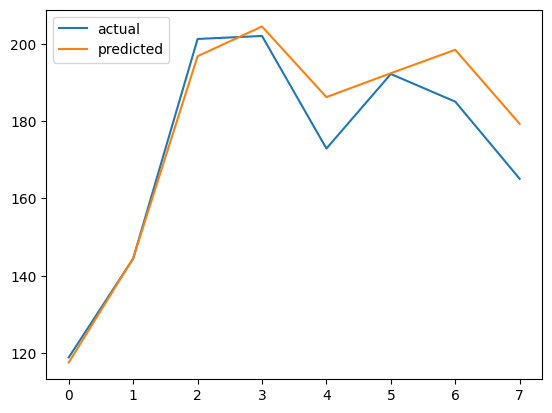

In [42]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

In [43]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6818
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 0.5611
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4463
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3433
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2604
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 0.2040
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1759
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1690
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.1678
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1590
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1387
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1109
Epoch 13/100
1/1 [==============================] - 0s 

### Predictions

In [45]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 476ms/step


In [46]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [47]:
comparison

,actual,predicted
0,118.849998,108.549530
1,144.429993,137.467163
2,201.289993,198.000198
3,202.070007,207.153336
4,172.919998,186.150223
5,192.220001,193.410568
6,185.059998,189.942413
7,165.080002,170.335770


In [48]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])
MSE

52.39512375614755

In [49]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Simple RNN with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Simple NN,73.547019
0,Simple RNN with more layers,52.395124


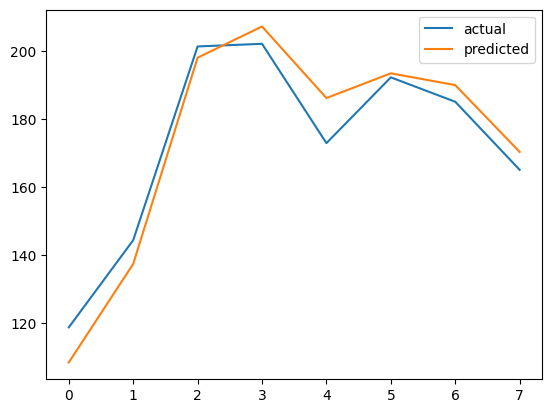

In [50]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [51]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.0297
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0042
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.9789
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 0.9540
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.9298
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.9058
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8821
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 0.8586
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.8352
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.8118
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - loss: 0.7886
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7654
Epoch 13/100
1/1 [==============================] - 0

### Predictions

In [53]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 307ms/step


In [54]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [55]:
comparison

,actual,predicted
0,118.849998,15.996707
1,144.429993,74.347488
2,201.289993,182.999084
3,202.070007,202.916061
4,172.919998,192.134201
5,192.220001,183.803741
6,185.059998,192.411484
7,165.080002,177.166382


In [56]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])
MSE

2058.2217518286816

In [57]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM RNN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Simple NN,73.547019
0,Simple RNN with more layers,52.395124
0,LSTM RNN,2058.221752


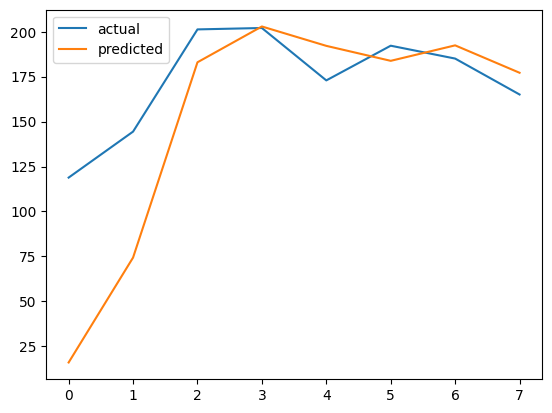

In [58]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [59]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 1.0270
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.9685
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 0.9134
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.8614
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.8119
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7645
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7188
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6745
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6313
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5890
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5478
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 0.5076
Epoch 13/100
1/1 [==============================] -

### Predictions

In [61]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 1s/step


In [62]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [63]:
comparison

,actual,predicted
0,118.849998,97.209946
1,144.429993,109.337128
2,201.289993,167.443604
3,202.070007,197.576569
4,172.919998,188.686920
5,192.220001,170.370865
6,185.059998,185.495758
7,165.080002,171.422867


In [64]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])
MSE

453.9965669327862

In [65]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM RNN with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Simple NN,73.547019
0,Simple RNN with more layers,52.395124
0,LSTM RNN,2058.221752
0,LSTM RNN with more layers,453.996567


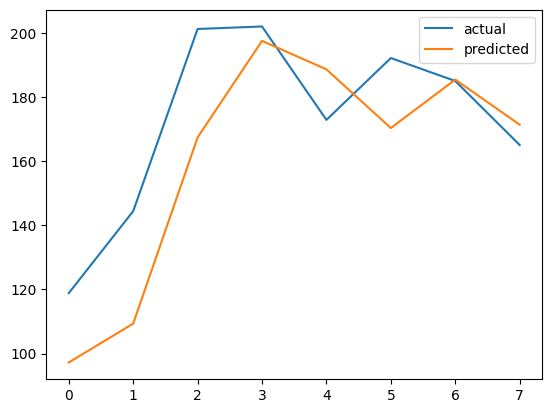

In [66]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [67]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.9715
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.8562
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 0.7827
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 0.7256
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6758
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6315
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5917
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5542
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5188
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4855
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4542
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4241
Epoch 13/100
1/1 [==============================] -

### Predictions

In [69]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 709ms/step


In [70]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [71]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])
MSE

206.80648422148863

In [72]:
performance = pd.concat([performance,pd.DataFrame({'model': 'GRU with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Simple NN,73.547019
0,Simple RNN with more layers,52.395124
0,LSTM RNN,2058.221752
0,LSTM RNN with more layers,453.996567
0,GRU with more layers,206.806484


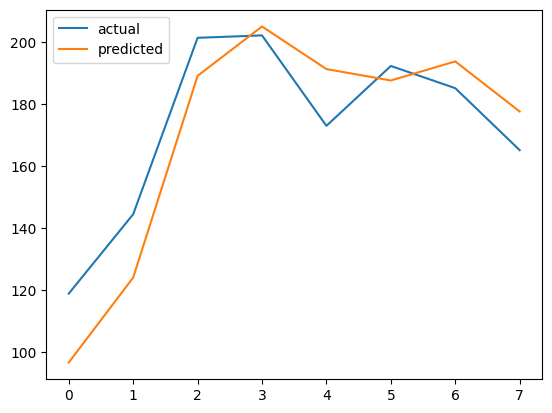

In [73]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [74]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [75]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.8524
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.8068
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7647
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7258
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6885
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6504
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6117
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5724
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5327
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4930
Epoch 11/100
1/1 [==============================] - 0s 23ms/step - loss: 0.4530
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4129
Epoch 13/100
1/1 [==============================] - 0

### Predictions

In [76]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 616ms/step


In [77]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [78]:
comparison

,actual,predicted
0,118.849998,88.233154
1,144.429993,115.915421
2,201.289993,182.170746
3,202.070007,201.034592
4,172.919998,189.899536
5,192.220001,180.756073
6,185.059998,191.341904
7,165.080002,176.200775


In [79]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])
MSE

337.4937440902999

In [80]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Conv 1D', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Simple NN,73.547019
0,Simple RNN with more layers,52.395124
0,LSTM RNN,2058.221752
0,LSTM RNN with more layers,453.996567
0,GRU with more layers,206.806484
0,Conv 1D,337.493744


In [84]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Conv1D

n_steps = sequence_length - 1
n_inputs = 1
monitor='val_root_mean_squared_error'
activation=None
loss="mean_squared_error"
metrics=[tf.keras.metrics.RootMeanSquaredError()]



# Deep RNN

In [85]:
n_steps = sequence_length - 1
n_inputs = 1


model = keras.models.Sequential(
    [
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[n_steps, n_inputs]),
        keras.layers.SimpleRNN(10, return_sequences=True),
        keras.layers.SimpleRNN(20, return_sequences=False), 
        keras.layers.Dense(1, activation=activation)
    ]
)

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    loss=loss, 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)

In [90]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta=0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    train_x, 
    train_target, 
    epochs=50,
    validation_data = (test_x, test_target), 
    callbacks=[early_stop]
)  

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 1.1756 - root_mean_squared_error: 1.0843 - val_loss: 0.9295 - val_root_mean_squared_error: 0.9641
Epoch 2/50
1/1 [==============================] - 0s 73ms/step - loss: 0.9817 - root_mean_squared_error: 0.9908 - val_loss: 0.7615 - val_root_mean_squared_error: 0.8727
Epoch 3/50
1/1 [==============================] - 0s 63ms/step - loss: 0.8250 - root_mean_squared_error: 0.9083 - val_loss: 0.6056 - val_root_mean_squared_error: 0.7782
Epoch 4/50
1/1 [==============================] - 0s 58ms/step - loss: 0.6822 - root_mean_squared_error: 0.8260 - val_loss: 0.4667 - val_root_mean_squared_error: 0.6832
Epoch 5/50
1/1 [==============================] - 0s 65ms/step - loss: 0.5572 - root_mean_squared_error: 0.7465 - val_loss: 0.3517 - val_root_mean_squared_error: 0.5931
Epoch 6/50
1/1 [==============================] - 0s 59ms/step - loss: 0.4547 - root_mean_squared_error: 0.6743 - val_loss: 0.2660 - val_root_mean_squared_er

In [92]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 452ms/step


In [93]:
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [94]:
mse_2=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_2

483.60312004480903

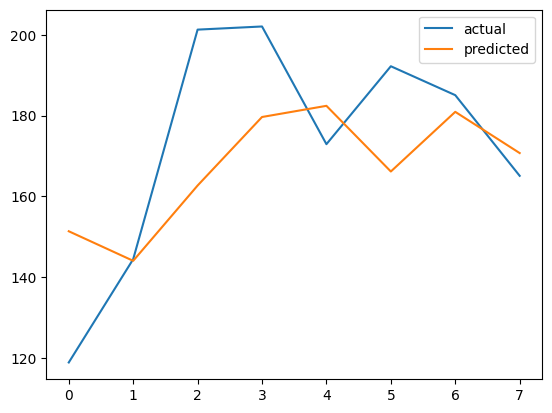

In [95]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [97]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Deep RNN', 'MSE':mse_2}, index=[0])])
performance

,model,MSE
0,Simple NN,73.547019
0,Simple RNN with more layers,52.395124
0,LSTM RNN,2058.221752
0,LSTM RNN with more layers,453.996567
0,GRU with more layers,206.806484
0,Conv 1D,337.493744
0,Deep RNN,483.603120


In [98]:
performance.sort_values(by='MSE')

,model,MSE
0,Simple RNN with more layers,52.395124
0,Simple NN,73.547019
0,GRU with more layers,206.806484
0,Conv 1D,337.493744
0,LSTM RNN with more layers,453.996567
0,Deep RNN,483.603120
0,LSTM RNN,2058.221752


### Here, i have taken a data set containing the closing stock prices at the end of the each day for Tesla over a period of one year. I have done the necessary pre-processing steps and done the chronological splitting of data into test and train data respectively. After that i had run various models such as RNN, LTSM, Gru, and Conv1D on the training data. 

### As we can see from the above results, the mean squared error for the model "RNN with more layers" gives the least value, that means it gives the highest accuracy among all the other models. The mean squared error (MSE) is a measure of the difference between the predicted values and the actual values. A lower MSE value indicates that the model is better at predicting the target variable.

### Since the data set sample that i have chosen is very small, the various models would not be performing that well in predicting the outcomes. This is why the models such as LSTM does not give you the accurate results.